In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import linear_model
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

In [2]:
raw = pd.read_csv('raw_data.csv')
raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [3]:
clean_raw = raw.dropna(axis=0)
clean_raw

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,8.994048296,5.442417711,4.34185547,16.514381,7.549490737
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,8.996528148,5.442417711,4.34185547,16.514381,7.549490737
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,8.999495876,5.442417711,4.34185547,16.514381,7.549490737
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,9.000853147,5.442417711,4.34185547,16.514381,7.549490737


In [4]:
raw_test = clean_raw
print(raw_test.columns.tolist())

raw_test.loc[:,'date'] = pd.to_datetime(raw_test.loc[:, 'date'])
raw_test.loc[:,'date'] = raw_test.date.dt.year
raw_test=raw_test.groupby(['location', 'date'], as_index=False).mean()


#new = raw_test.aggregate('mean')
RAW= raw_test
RAW

['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


/var/folders/nj/f950bkd10j58b2r4mzfhlg9c0000gn/T/ipykernel_19224/2531725494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_test.loc[:,'date'] = pd.to_datetime(raw_test.loc[:, 'date'])
/var/folders/nj/f950bkd10j58b2r4mzfhlg9c0000gn/T/ipykernel_19224/2531725494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_test.loc[:,'date'] = raw_test.date.dt.year


,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 12
0,Afghanistan,2019,0.000000,0.000000,0.000000,38928341.0,1803.987,0.498,17.477233
1,Afghanistan,2020,16374.541219,520.383513,49.316165,38928341.0,1803.987,0.498,17.477233
2,Albania,2020,4104.860577,120.759615,68.107452,2877800.0,11803.431,0.785,14.872537
3,Algeria,2020,21109.051402,904.654206,75.205374,43851043.0,13913.839,0.754,17.596309
4,Angola,2020,1200.652850,48.637306,79.024041,32866268.0,5819.495,0.581,17.307957
...,...,...,...,...,...,...,...,...,...
158,Venezuela,2020,22257.207921,187.816832,83.926188,28435943.0,16745.022,0.761,17.163165
159,Vietnam,2020,1005.950000,28.975000,68.137000,97338583.0,6171.884,0.694,18.393706
160,Yemen,2020,1299.987879,364.400000,44.279758,29825968.0,1479.147,0.452,17.210890
161,Zambia,2020,4909.537634,116.741935,49.719624,18383956.0,3689.251,0.588,16.726989


In [5]:
RAW = RAW[RAW.date != 2019]
RAW = RAW[(RAW != 0).all(1)]
RAW.rename(columns={'gdp_per_capita': 'GDPCAP', 'total_cases':'TD', 'human_development_index': 'HDI', 'total_cases': 'TC' , 'stringency_index': 'STI', 'population':'POP','total_deaths': 'TD', 'location': 'COUNTRY', 'date': 'DATE'}, inplace=True) 
#RAW.rename(columns={'total_deaths': 'rawTD', 'location': 'COUNTRY', 'date': 'DATE'}, inplace=True)
RAW

,COUNTRY,DATE,TC,TD,STI,POP,GDPCAP,HDI,Unnamed: 12
1,Afghanistan,2020,16374.541219,520.383513,49.316165,38928341.0,1803.987,0.498,17.477233
2,Albania,2020,4104.860577,120.759615,68.107452,2877800.0,11803.431,0.785,14.872537
3,Algeria,2020,21109.051402,904.654206,75.205374,43851043.0,13913.839,0.754,17.596309
4,Angola,2020,1200.652850,48.637306,79.024041,32866268.0,5819.495,0.581,17.307957
5,Argentina,2020,176960.654206,3876.794393,88.403318,45195777.0,18933.907,0.825,17.626514
...,...,...,...,...,...,...,...,...,...
158,Venezuela,2020,22257.207921,187.816832,83.926188,28435943.0,16745.022,0.761,17.163165
159,Vietnam,2020,1005.950000,28.975000,68.137000,97338583.0,6171.884,0.694,18.393706
160,Yemen,2020,1299.987879,364.400000,44.279758,29825968.0,1479.147,0.452,17.210890
161,Zambia,2020,4909.537634,116.741935,49.719624,18383956.0,3689.251,0.588,16.726989


In [6]:
x = RAW[['GDPCAP', 'HDI']]
Y = RAW['TD']

In [7]:
x = sm.add_constant(x) # adding a constant
 
modelRAW = sm.OLS(Y, x).fit()
predictions = modelRAW.predict(x) 
 
print_modelRAW = modelRAW.summary()
print(print_modelRAW)

                            OLS Regression Results                            
Dep. Variable:                     TD   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.399
Date:                Sun, 04 Dec 2022   Prob (F-statistic):             0.0360
Time:                        18:29:16   Log-Likelihood:                -1629.6
No. Observations:                 152   AIC:                             3265.
Df Residuals:                     149   BIC:                             3274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7290.0573   5335.001     -1.366      0.1

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,35.3,const
1,2.4,GDPCAP
2,2.4,HDI


In [9]:
white_test = het_white(modelRAW.resid,  modelRAW.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value',' F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 6.491778703650649, 'Test Statistic p-value': 0.2612617267941708, ' F-Statistic': 1.3027438343881037, 'F-Test p-value': 0.2659376784733383}


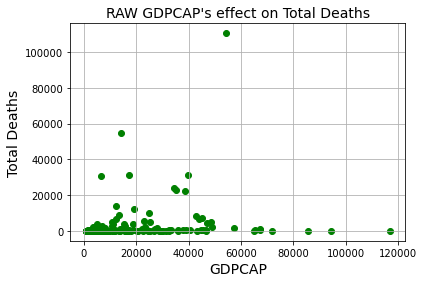

In [10]:
plt.scatter(RAW['GDPCAP'], RAW['TD'], color='green')
plt.title("RAW GDPCAP's effect on Total Deaths", fontsize=14)
plt.xlabel('GDPCAP', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.grid(True)
#plt.show()
#plt.savefig('GDPCAP.png')

# Transform

In [11]:
df = pd.read_csv('transformed_data.csv')
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [12]:
len(df.index)

50418

In [13]:
country = df['CODE']
country.value_counts()

AFG    294
IDN    294
MKD    294
LUX    294
LTU    294
      ... 
TJK    172
COM    171
LSO    158
HKG     51
SLB      4
Name: CODE, Length: 210, dtype: int64

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB
None


In [15]:
df.isnull() 

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
50413,False,False,False,False,False,False,False,False,False
50414,False,False,False,False,False,False,False,False,False
50415,False,False,False,False,False,False,False,False,False
50416,False,False,False,False,False,False,False,False,False


In [16]:
df['HDI'].isnull().values.any()

True

# HDI has 6202 null values

In [17]:
df['HDI'].isnull().sum()

6202

# This can be ignored
### Removing the nan values, visualizing the data

In [18]:
clean_df = df.dropna(axis=0)

In [19]:
clean_df['HDI'].isnull().sum()

0

In [20]:
clean_df['TD'].isnull().sum()

0

<AxesSubplot:xlabel='HDI', ylabel='TD'>

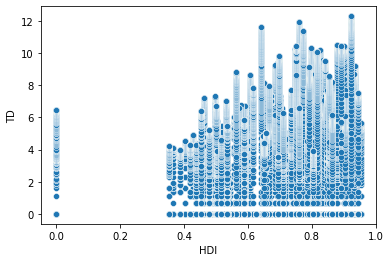

In [21]:
sns.scatterplot(data=clean_df, x='HDI', y='TD')

<AxesSubplot:xlabel='GDPCAP', ylabel='TD'>

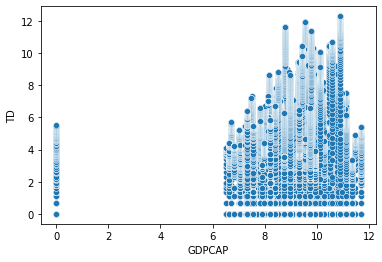

In [22]:
sns.scatterplot(data=clean_df, x='GDPCAP', y='TD')

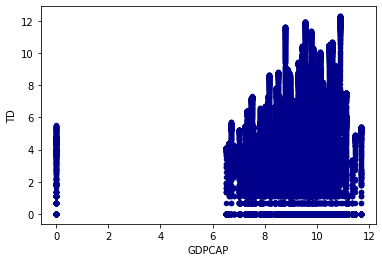

In [23]:
ax1 = clean_df.plot.scatter(x='GDPCAP', y='TD', c='DarkBlue')

# Tranforming the data to merge daily info to yearly info by taking the mean

In [24]:
df_test = clean_df
print(df_test.columns.tolist())

df_test.loc[:,'DATE'] = pd.to_datetime(df_test.loc[:, 'DATE'])
df_test.loc[:,'DATE'] = df_test.DATE.dt.year
df_test=df_test.groupby(['COUNTRY', 'DATE'], as_index=False).mean()

new = df_test
new


['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']


/var/folders/nj/f950bkd10j58b2r4mzfhlg9c0000gn/T/ipykernel_19224/2240256556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,'DATE'] = pd.to_datetime(df_test.loc[:, 'DATE'])
/var/folders/nj/f950bkd10j58b2r4mzfhlg9c0000gn/T/ipykernel_19224/2240256556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,'DATE'] = df_test.DATE.dt.year


,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,Afghanistan,2019,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,Afghanistan,2020,0.498,6.828144,4.187536,3.060082,17.477233,7.497754
2,Albania,2020,0.785,7.565514,4.130528,3.927348,14.872537,9.376146
3,Algeria,2019,0.754,0.000000,0.000000,0.000000,17.596309,9.540639
4,Algeria,2020,0.754,7.005156,4.799373,3.206073,17.596309,9.540639
...,...,...,...,...,...,...,...,...
240,Vietnam,2019,0.694,0.000000,0.000000,0.000000,18.393706,8.727759
241,Vietnam,2020,0.694,4.950369,0.892618,3.723534,18.393706,8.727759
242,Yemen,2020,0.452,6.027499,4.808522,3.609601,17.210890,7.299221
243,Zambia,2020,0.588,7.165626,3.383976,3.617026,16.726989,8.213179


# Removing the data from 2019 and removing the zeros

In [25]:
new = new[new.DATE != 2019]
new = new[(new != 0).all(1)]
new

,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
1,Afghanistan,2020,0.498,6.828144,4.187536,3.060082,17.477233,7.497754
2,Albania,2020,0.785,7.565514,4.130528,3.927348,14.872537,9.376146
4,Algeria,2020,0.754,7.005156,4.799373,3.206073,17.596309,9.540639
6,Angola,2020,0.581,5.679145,2.783673,4.112616,17.307957,8.668969
8,Argentina,2020,0.825,9.268997,6.045323,4.054678,17.626514,9.848710
...,...,...,...,...,...,...,...,...
239,Venezuela,2020,0.761,8.268582,3.895227,4.343886,17.163165,9.725856
241,Vietnam,2020,0.694,4.950369,0.892618,3.723534,18.393706,8.727759
242,Yemen,2020,0.452,6.027499,4.808522,3.609601,17.210890,7.299221
243,Zambia,2020,0.588,7.165626,3.383976,3.617026,16.726989,8.213179


# Renaming the column names to better reflect the transformation

In [28]:

new.rename(columns={ 'GDPCAP':'lnGDPCAP', 'TD':'lnTD', 'TC': 'lnTC' , 'STI': 'lnSTI', 'POP':'lnPOP','TD': 'lnTD'}, inplace=True) 
new

,COUNTRY,DATE,HDI,lnTC,lnTD,lnSTI,lnPOP,lnGDPCAP
1,Afghanistan,2020,0.498,6.828144,4.187536,3.060082,17.477233,7.497754
2,Albania,2020,0.785,7.565514,4.130528,3.927348,14.872537,9.376146
4,Algeria,2020,0.754,7.005156,4.799373,3.206073,17.596309,9.540639
6,Angola,2020,0.581,5.679145,2.783673,4.112616,17.307957,8.668969
8,Argentina,2020,0.825,9.268997,6.045323,4.054678,17.626514,9.848710
...,...,...,...,...,...,...,...,...
239,Venezuela,2020,0.761,8.268582,3.895227,4.343886,17.163165,9.725856
241,Vietnam,2020,0.694,4.950369,0.892618,3.723534,18.393706,8.727759
242,Yemen,2020,0.452,6.027499,4.808522,3.609601,17.210890,7.299221
243,Zambia,2020,0.588,7.165626,3.383976,3.617026,16.726989,8.213179


# Correlation Table

In [29]:
new.corr()

,DATE,HDI,lnTC,lnTD,lnSTI,lnPOP,lnGDPCAP
DATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HDI,NaN,1.000000,0.287971,0.315680,-0.402258,-0.126487,0.955126
lnTC,NaN,0.287971,1.000000,0.890903,0.047296,0.567412,0.264714
lnTD,NaN,0.315680,0.890903,1.000000,-0.141021,0.604921,0.284340
lnSTI,NaN,-0.402258,0.047296,-0.141021,1.000000,-0.103188,-0.392106
lnPOP,NaN,-0.126487,0.567412,0.604921,-0.103188,1.000000,-0.143980
lnGDPCAP,NaN,0.955126,0.264714,0.284340,-0.392106,-0.143980,1.000000


# Final Cleaned Data 

In [31]:
new

,COUNTRY,DATE,HDI,lnTC,lnTD,lnSTI,lnPOP,lnGDPCAP,lnHDI
1,Afghanistan,2020,0.498,6.828144,4.187536,3.060082,17.477233,7.497754,-0.697155
2,Albania,2020,0.785,7.565514,4.130528,3.927348,14.872537,9.376146,-0.242072
4,Algeria,2020,0.754,7.005156,4.799373,3.206073,17.596309,9.540639,-0.282363
6,Angola,2020,0.581,5.679145,2.783673,4.112616,17.307957,8.668969,-0.543005
8,Argentina,2020,0.825,9.268997,6.045323,4.054678,17.626514,9.848710,-0.192372
...,...,...,...,...,...,...,...,...,...
239,Venezuela,2020,0.761,8.268582,3.895227,4.343886,17.163165,9.725856,-0.273122
241,Vietnam,2020,0.694,4.950369,0.892618,3.723534,18.393706,8.727759,-0.365283
242,Yemen,2020,0.452,6.027499,4.808522,3.609601,17.210890,7.299221,-0.794073
243,Zambia,2020,0.588,7.165626,3.383976,3.617026,16.726989,8.213179,-0.531028


# Saving the cleaned data as a new csv file

In [32]:
#new.to_csv('./updated.csv')

# Plotting HDI vs lnTD

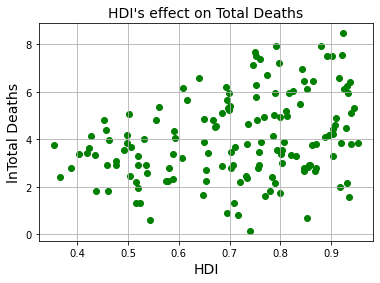

In [33]:
plt.scatter(new['HDI'], new['lnTD'], color='green')
plt.title("HDI's effect on Total Deaths", fontsize=14)
plt.xlabel('HDI', fontsize=14)
plt.ylabel('lnTotal Deaths', fontsize=14)
plt.grid(True)
#plt.show()
plt.savefig('HDI.png')

# Plotting lnGDPCAP vs lnTD

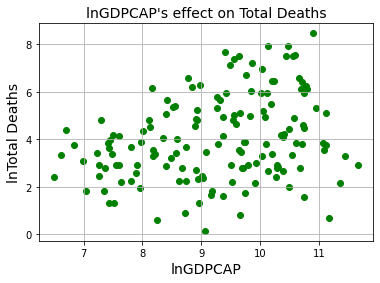

In [34]:
plt.scatter(new['lnGDPCAP'], new['lnTD'], color='green')
plt.title("lnGDPCAP's effect on Total Deaths", fontsize=14)
plt.xlabel('lnGDPCAP', fontsize=14)
plt.ylabel('lnTotal Deaths', fontsize=14)
plt.grid(True)
#plt.show()
plt.savefig('GDPCAP.png')

# Setting Depenedent and Independent Variables

In [52]:
X = new[['lnGDPCAP', 'HDI']]
y = new['lnTD']

# Running Regression and getting the Coefficients

In [53]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 2.65510277130348
Coefficients: 
 [-0.28507295  5.64759642]


# Model Summary OLS

In [55]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   lnTD   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     8.499
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           0.000321
Time:                        18:37:36   Log-Likelihood:                -292.50
No. Observations:                 151   AIC:                             591.0
Df Residuals:                     148   BIC:                             600.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6551      1.660      1.599      0.1

# Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,144.7,const
1,11.4,lnGDPCAP
2,11.4,HDI


# Model Summary WLS

In [188]:
sampleW = np.ones(151) * 151
sampleW[-15:] *= 80
mod_wls = sm.WLS(y, X, sampleW)
res_wls = mod_wls.fit()
print(res_wls.summary())

# sampleW = np.ones(151) * 151
# sampleW[-10:] *= 130
# mod_wls = sm.WLS(y, X, sampleW)
# res_wls = mod_wls.fit()
# print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                   lnTD   R-squared:                       0.255
Model:                            WLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     25.26
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.64e-10
Time:                        21:34:57   Log-Likelihood:                -441.98
No. Observations:                 151   AIC:                             890.0
Df Residuals:                     148   BIC:                             899.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0506      1.719      0.029      0.9

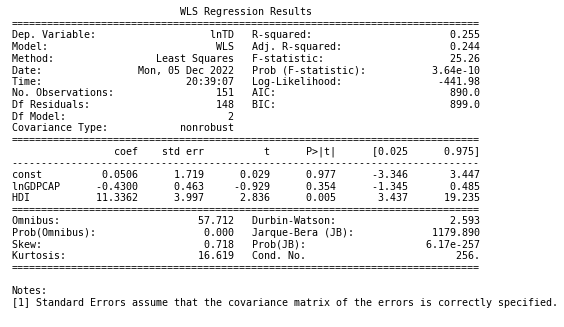

In [128]:
plt.rc('figure', figsize=(8, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(res_wls.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
#plt.savefig('wls.png')

# WLS White Test

In [189]:
white_test = het_white(res_wls.resid,  res_wls.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value',' F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 6.327527382375161, 'Test Statistic p-value': 0.2756406942188171, ' F-Statistic': 1.2683704838160408, 'F-Test p-value': 0.28075280218053583}


# OLS White Test


In [190]:
white_test = het_white(model.resid,  model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value',' F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 12.67517178031914, 'Test Statistic p-value': 0.026620552484670722, ' F-Statistic': 2.657368068771298, 'F-Test p-value': 0.02489613349996174}
